###Preprocessing Data Sentimen Tokopedia
task utama : bisa sampe dilabelin data nya

-

###**Daftar Referensi**

Implementasi IndoBERT :

`https://journal.uad.ac.id/index.php/JITEKI/article/view/29450/pdf_298`

`https://ejurnal.seminar-id.com/index.php/josyc/article/download/6864/3559/`

----
Clustering

`https://www.geeksforgeeks.org/what-is-text-clustering-in-nlp/`

----
Model :

`https://huggingface.co/indobenchmark/indobert-base-p1`

`https://medium.com/data-folks-indonesia/bag-of-words-vs-tf-idf-penjelasan-dan-perbedaannya-3739f32cdc72`

`https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/`

----

In [ ]:
path = "drive/MyDrive/"

In [ ]:
%pip install nltk

In [ ]:
%pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
to_select = pd.read_csv(path + "tokopedia_app_review.csv")

data = to_select[pd.to_datetime(to_select['created_at']) > pd.to_datetime('2024-11-30 23:59:00')]
data

,review_id,username,content,score,created_at,reply_content,replied_at,app_id
0,4c58be17-4946-4082-9f29-b5f75b08c948,Pengguna Google,Waktu menghubungkan ke dana di suruh masukin 6...,3,2024-12-26 07:12:25,"Terima kasih atas rating yang kamu berikan, To...",2024-12-26 07:28:09,com.tokopedia.tkpd
1,de4dbd16-aea4-4578-b425-f9a703d58018,Pengguna Google,toko pedia mantap dan terpercaya... tingkatkan...,5,2024-12-26 06:44:13,"Toppers, terima kasih atas rating yang kamu be...",2024-12-26 06:48:38,com.tokopedia.tkpd
2,402b5f65-81b5-4988-96ae-08fe73faf35c,Pengguna Google,lambat,1,2024-12-26 06:43:26,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-12-26 06:48:39,com.tokopedia.tkpd
3,1a5306af-88a3-4852-a06c-c3d2379776df,Pengguna Google,Tokopedia mohon untuk seller nya cepat dalam m...,5,2024-12-26 06:34:45,"Hi Toppers, terima kasih untuk rating dan ulas...",2024-12-26 06:48:44,com.tokopedia.tkpd
4,d54918b0-3717-4379-b7e1-14a28fce59ef,Pengguna Google,BROOTHER GAMING 4 bintang aj dl ya so baru per...,4,2024-12-26 06:34:44,"Toppers, terima kasih atas rating yang kamu be...",2024-12-26 06:48:45,com.tokopedia.tkpd
...,...,...,...,...,...,...,...,...
4543,763dd5c2-2701-495a-88cc-9f0ac120b4b0,Pengguna Google,Ini sudah tanggal waktunya 12.12 tapi kenapa d...,3,2024-12-01 00:37:04,"Terima kasih atas rating yang kamu berikan, To...",2024-12-01 00:48:06,com.tokopedia.tkpd
4544,55fbec9b-12cd-460e-87e8-797524396201,Pengguna Google,Aplikasi kurang baik proses terlalu ribet.,1,2024-12-01 00:34:06,"Halo Toppers, terima kasih atas rating yang ka...",2024-12-01 00:40:12,com.tokopedia.tkpd
4545,4fc0d5d0-49e6-4cf1-8200-1e7e8f71a6d3,Pengguna Google,banyakin diskon ya tokped hehe,4,2024-12-01 00:32:47,"Toppers, terima kasih atas rating yang kamu be...",2024-12-01 00:48:09,com.tokopedia.tkpd
4546,e9616b0a-b240-40be-a32c-b15a0b6b9df7,Pengguna Google,Tokopedia kenapa tiap bulan mesti harus update...,3,2024-12-01 00:24:49,"Terima kasih atas rating yang kamu berikan, To...",2024-12-01 00:28:01,com.tokopedia.tkpd


Preprocessing

In [ ]:
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
#stemmer sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
import numpy as np
import re
import string
string.punctuation

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

stopwords = stopwords.words('indonesian')

plt.style.use('ggplot')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stopwords)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [ ]:
#pilih beberapa kolom saja
df = data.copy()
df = df[['username','content', 'score','created_at']]
df

,username,content,score,created_at
0,Pengguna Google,Waktu menghubungkan ke dana di suruh masukin 6...,3,2024-12-26 07:12:25
1,Pengguna Google,toko pedia mantap dan terpercaya... tingkatkan...,5,2024-12-26 06:44:13
2,Pengguna Google,lambat,1,2024-12-26 06:43:26
3,Pengguna Google,Tokopedia mohon untuk seller nya cepat dalam m...,5,2024-12-26 06:34:45
4,Pengguna Google,BROOTHER GAMING 4 bintang aj dl ya so baru per...,4,2024-12-26 06:34:44
...,...,...,...,...
4543,Pengguna Google,Ini sudah tanggal waktunya 12.12 tapi kenapa d...,3,2024-12-01 00:37:04
4544,Pengguna Google,Aplikasi kurang baik proses terlalu ribet.,1,2024-12-01 00:34:06
4545,Pengguna Google,banyakin diskon ya tokped hehe,4,2024-12-01 00:32:47
4546,Pengguna Google,Tokopedia kenapa tiap bulan mesti harus update...,3,2024-12-01 00:24:49


Quick EDA

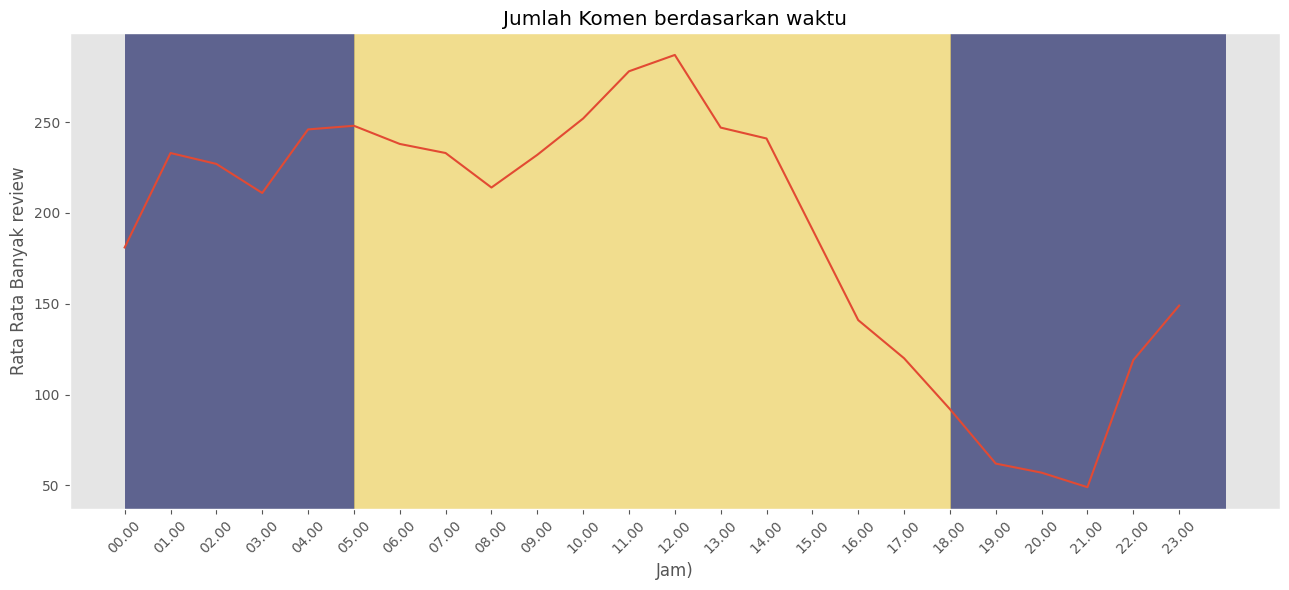

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])

df['hour'] = df['created_at'].dt.hour

hourly_reviews = df.groupby('hour')['created_at'].count()

plt.figure(figsize=(13, 6))
plt.plot(hourly_reviews.index, hourly_reviews.values)
plt.xlabel('Jam)')
plt.ylabel('Rata Rata Banyak review')
plt.title('Jumlah Komen berdasarkan waktu')

plt.xticks(range(24), [f'{i:02d}.00' for i in range(24)])
plt.grid(False)

plt.xticks(rotation=45)
plt.tight_layout()

plt.axvspan(18, 24, color='#040d57', alpha=0.6)
plt.axvspan(0, 5, color='#040d57', alpha=0.6)
plt.axvspan(5,18, color='#f7db6a', alpha=0.7)

plt.show()

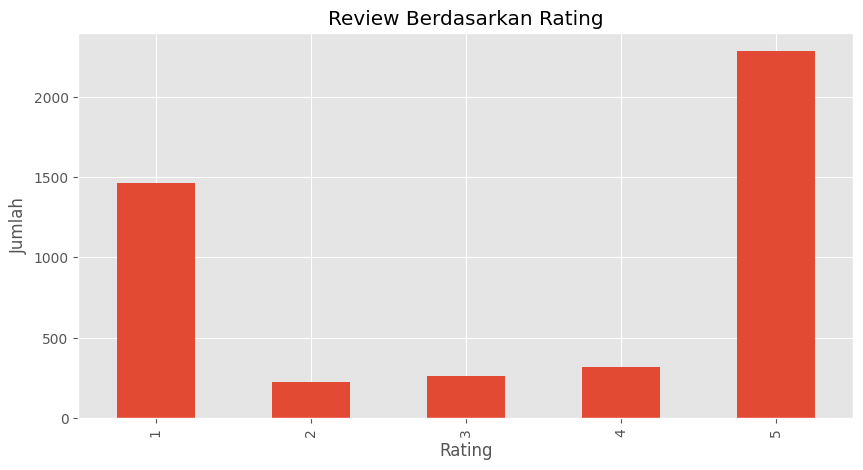

In [ ]:
ax = df['score'].value_counts().sort_index() \
    .plot(kind='bar', title="Review Berdasarkan Rating", figsize=(10, 5))
ax.set_xlabel("Rating")
ax.set_ylabel("Jumlah")
plt.show()

Preprocessing

Berdasarkan referensi : https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

-

tahapan preprpcessing ::

- puncation removal
- lowering text
- Tokenize
- stopword removal
- stemming (pake sastrawi)
- lemmatize ()

In [ ]:
abbreviations = {
        "dl": "dulu",
        "jg": "juga",
        "jd":"jadi",
        "jdi":"jadi",
        "tpi":"tapi",
        "tp":"tapi",
        "gak": "tidak",
        "gk":"tidak",
        "aj": "saja",
        "nggak": "tidak",
        "ga": "tidak",
        "kalo": "kalau",
        "apk": "aplikasi",
        "msh": "masih",
        "msih": "masih",
        "gue": "saya",
        "gw": "saya",
        "lu": "kamu",
        "lo": "kamu",
        "loe": "kamu",
        "anjay": "bagus",
        "knp": "kenapa",
        "lemot": "lambat",
        "mantab": "bagus",
        "mantul" : "bagus",
        "vocer": "voucher",
        "ilang": "hilang",
        "yg": "yang",
        "yng": "yang",
        "ngaco": "kacau",
        "lg": "lagi",
        "discond": "diskon",
        "product": "produk",
        "masukin": "masuk",
        "udh":"sudah",
        "oke":"bagus",
        "bsa":"bisa",
        "gercep":"gerak cepat",
        "cod": "cash on delivery",
        "tuk":"untuk",
        "untk":"untuk",
        "tw":"tahu",
        "tau":"tahu",
        "laen" : "lain",
        "tlg":"tolong",
        "nyampenya":"sampainya",
        "nyampe":"sampai",
        "veripikasi":"verifikasi",
        "melulu":"selalu",
        "dpt":"dapat",
        "dapt":"dapat",
        "ap":"apa",
        "iy":"iya",
        "tloll":"bodoh",
        "bntr":"sebentar",
        "lgi":"lagi",
        "bngkrut": "bangkrut",
        "ok":"oke",
        'tdk'  : 'tidak',
        'yg' : 'yang',
        'ga' : 'tidak',
        'gak' : 'tidak',
        'tp' : 'tapi',
        'd' : 'di',
        'sy' : 'saya',
        '&' : 'dan',
        'dgn' : 'dengan',
        'utk' : 'untuk',
        'gk' : 'tidak',
        'jd' : 'jadi',
        'jg' : 'juga',
        'dr' : 'dari',
        'krn' : 'karena',
        'aja' : 'saja',
        'karna' : 'karena',
        'udah' : 'sudah',
        'kmr' : 'kamar',
        'g' : 'tidak',
        'dpt' : 'dapat',
        'banget' : 'sekali',
        'bgt' : 'sekali',
        'kalo' : 'kalau',
        'n' : 'dan',
        'bs' : 'bisa',
        'oke' : 'ok',
        'dg' : 'dengan',
        'pake' : 'pakai',
        'sampe' : 'sampai',
        'dapet' : 'dapat',
        'ad' : 'ada',
        'lg' : 'lagi',
        'bikin' : 'buat',
        'tak' : 'tidak',
        'ny' : 'nya',
        'ngga' : 'tidak',
        'nunggu' : 'tunggu',
        'klo' : 'kalau',
        'blm' : 'belum',
        'trus' : 'terus',
        'kayak' : 'seperti',
        'dlm' : 'dalam',
        'udh' : 'sudah',
        'tau' : 'tahu',
        'org' : 'orang',
        'hrs' : 'harus',
        'msh' : 'masih',
        'sm' : 'sama',
        'byk' : 'banyak',
        'krg' : 'kurang',
        'kmar' : 'kamar',
        'spt' : 'seperti',
        'pdhl' : 'padahal',
        'chek' : 'cek',
        'pesen' : 'pesan',
        'kran' : 'keran',
        'gitu' : 'begitu',
        'tpi' : 'tapi',
        'lbh' : 'lebih',
        'tmpt' : 'tempat',
        'dikasi' : 'dikasih',
        'serem' : 'seram',
        'sya' : 'saya',
        'jgn' : 'jangan',
        'dri' : 'dari',
        'dtg' : 'datang',
        'gada' : 'tidak ada',
        'standart' : 'standar',
        'mlm' : 'malam',
        'k'  : 'ke',
        'kl' : 'kalau',
        'sgt': 'sangat',
        'y' : 'ya',
        'krna' : 'karena',
        'tgl' : 'tanggal',
        'terimakasih' : 'terima kasih',
        'kecoak' : 'kecoa',
        'pd' : 'pada',
        'tdr' : 'tidur',
        'jdi' : 'jadi',
        'kyk' : 'seperti',
        'sdh' : 'sudah',
        'ama' : 'sama',
        'gmana' : 'bagaimana',
        'dalem' : 'dalam',
        'tanyak' : 'tanya',
        'taru' : 'taruh',
        'gede' : 'besar',
        'kaya' : 'seperti',
        'access' : 'akses',
        'tetep' : 'tetap',
        'mgkin' : 'mungkin',
        'sower' : 'shower',
        'idup' : 'hidup',
        'nyaaa' : 'nya',
        'baikk' : 'baik',
        'hanay' : 'hanya',
        'tlp' : 'telpon',
        'kluarga' : 'keluarga',
        'jln' : 'jalan',
        'hr' : 'hari',
        'ngak' : 'tidak',
        'bli' : 'beli',
        'kmar' : 'kamar',
        'naro' : 'taruh',
        'smoga' : 'semoga',
        'dong': 'dong',
        'dgn': 'dengan',
        'solusinya':"solusi",
        "seharusnya":"harus",
        'pake' : 'pakai',
        'pke' : 'pakai',
        'memudhkan':"mudah",
        "fre" : "gratis",
        "free":"gratis",
        "mantep":"bagus",
        "nya":"nya",
    }

In [ ]:
def clean_text(text):
    # Menghapus URL, mention, dan hashtag
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)

    # Menghapus emoticon atau simbol khusus
    emoji_pattern = re.compile(
        "[" +
        u"\U0001F600-\U0001F64F" +  # Emoticon
        u"\U0001F300-\U0001F5FF" +  # Simbol & Piktogram
        u"\U0001F680-\U0001F6FF" +  # Simbol Transportasi
        u"\U0001F1E0-\U0001F1FF" +  # Simbol Bendera
        u"\U00002500-\U00002BEF" +
        u"\U00002702-\U000027B0" +
        u"\U000024C2-\U0001F251" +
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()

    # Mengubah teks menjadi lowercase
    text = text.lower()

    def normalize_word(word):
      return re.sub(r'(.)\1{4,}', r'\1\1', word)

    words = text.split()

    cleaned_words = []
    for word in words:
        word = abbreviations.get(word, word)  # Substitusi kata jika ada di abbreviations
        word = normalize_word(word)          # Normalisasi huruf berulang
        cleaned_words.append(word)

    cleaned_text = ' '.join(cleaned_words)

    #kalau semisal ada kata toko lalu setelahnya pedia kita buat jadi 1 kata
    cleaned_text = re.sub(r'\btoko\s+pedia\b', 'tokopedia', cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r'\btokped\b', 'tokopedia', cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r'\btoped\b', 'tokopedia', cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r'\btokopediaa\b', 'tokopedia', cleaned_text, flags=re.IGNORECASE)

    return cleaned_text

df['content_prepo'] = df['content'].apply(clean_text)
df.tail(20)


,username,content,score,created_at,content_prepo
4528,Pengguna Google,Tokopedia kalau Ada Pengguna Akun Baru .. Tolo...,3,2024-12-01 02:35:01,tokopedia kalau ada pengguna akun baru tolong ...
4529,Pengguna Google,Saya order via tiktok. Dri tgl 29 sampe sekara...,1,2024-12-01 02:33:14,saya order via tiktok dari tanggal 29 sampai s...
4530,Pengguna Google,dpt memudhkan setiap transaksi,5,2024-12-01 02:24:37,dapat mudah setiap transaksi
4531,Pengguna Google,kereennn,5,2024-12-01 02:18:17,kereennn
4532,Pengguna Google,Kok gk bisa cod sih,4,2024-12-01 02:13:08,kok tidak bisa cash on delivery sih
4533,Pengguna Google,"Tlg tokopedia,jgn pakai kurir sicepat,tdk sesu...",5,2024-12-01 02:03:47,tolong tokopediajgn pakai kurir sicepattdk ses...
4534,Pengguna Google,free ongkirnya mana ini??,2,2024-12-01 01:56:59,gratis ongkirnya mana ini
4535,Pengguna Google,"sering dpt promoan,, mantep",5,2024-12-01 01:47:40,sering dapat promoan bagus
4536,Pengguna Google,Kenapa ya saya tidak bisa veripikasi data load...,3,2024-12-01 01:40:07,kenapa ya saya tidak bisa verifikasi data load...
4537,Pengguna Google,"Kurang Transparan TAGIHAN TOKOPEDIA CARD, apa ...",1,2024-12-01 01:37:38,kurang transparan tagihan tokopedia card apa a...


In [ ]:
# tokenizeing
#test dulu

kalimat = "beda kota pisah raga bukan masalahku, lihat wajahmu dilayar ku tetap bersyukur"

tokenized_word = word_tokenize(kalimat)
tokenized_word

['beda',
 'kota',
 'pisah',
 'raga',
 'bukan',
 'masalahku',
 ',',
 'lihat',
 'wajahmu',
 'dilayar',
 'ku',
 'tetap',
 'bersyukur']

In [ ]:
def tokenize_sentence(text):
  text = word_tokenize(text)
  text = [word for word in text if word.isalpha()]
  return text

df['content_tokenized'] = df['content_prepo'].apply(tokenize_sentence)
df.head(5)

,username,content,score,created_at,content_prepo,content_tokenized
0,Pengguna Google,Waktu menghubungkan ke dana di suruh masukin 6...,3,2024-12-26 07:12:25,waktu menghubungkan ke dana di suruh masuk 6 p...,"[waktu, menghubungkan, ke, dana, di, suruh, ma..."
1,Pengguna Google,toko pedia mantap dan terpercaya... tingkatkan...,5,2024-12-26 06:44:13,tokopedia mantap dan terpercaya tingkatkan pel...,"[tokopedia, mantap, dan, terpercaya, tingkatka..."
2,Pengguna Google,lambat,1,2024-12-26 06:43:26,lambat,[lambat]
3,Pengguna Google,Tokopedia mohon untuk seller nya cepat dalam m...,5,2024-12-26 06:34:45,tokopedia mohon untuk seller nya cepat dalam m...,"[tokopedia, mohon, untuk, seller, nya, cepat, ..."
4,Pengguna Google,BROOTHER GAMING 4 bintang aj dl ya so baru per...,4,2024-12-26 06:34:44,broother gaming 4 bintang saja dulu ya so baru...,"[broother, gaming, bintang, saja, dulu, ya, so..."


In [ ]:
custom_stopwords = list(abbreviations.keys())

def remove_stopwords(text):
  text = [word for word in text if word not in custom_stopwords and word not in stopwords]
  return text

df['no_stopwords'] = df['content_tokenized'].apply(remove_stopwords)
df

,username,content,score,created_at,content_prepo,content_tokenized,no_stopwords
0,Pengguna Google,Waktu menghubungkan ke dana di suruh masukin 6...,3,2024-12-26 07:12:25,waktu menghubungkan ke dana di suruh masuk 6 p...,"[waktu, menghubungkan, ke, dana, di, suruh, ma...","[menghubungkan, dana, suruh, masuk, pin, pin, ..."
1,Pengguna Google,toko pedia mantap dan terpercaya... tingkatkan...,5,2024-12-26 06:44:13,tokopedia mantap dan terpercaya tingkatkan pel...,"[tokopedia, mantap, dan, terpercaya, tingkatka...","[tokopedia, mantap, terpercaya, tingkatkan, pe..."
2,Pengguna Google,lambat,1,2024-12-26 06:43:26,lambat,[lambat],[lambat]
3,Pengguna Google,Tokopedia mohon untuk seller nya cepat dalam m...,5,2024-12-26 06:34:45,tokopedia mohon untuk seller nya cepat dalam m...,"[tokopedia, mohon, untuk, seller, nya, cepat, ...","[tokopedia, mohon, seller, cepat, menangani, p..."
4,Pengguna Google,BROOTHER GAMING 4 bintang aj dl ya so baru per...,4,2024-12-26 06:34:44,broother gaming 4 bintang saja dulu ya so baru...,"[broother, gaming, bintang, saja, dulu, ya, so...","[broother, gaming, bintang, ya, so, beli, toko..."
...,...,...,...,...,...,...,...
4543,Pengguna Google,Ini sudah tanggal waktunya 12.12 tapi kenapa d...,3,2024-12-01 00:37:04,ini sudah tanggal waktunya 1212 tapi kenapa di...,"[ini, sudah, tanggal, waktunya, tapi, kenapa, ...","[tanggal, aplikasi, diskon]"
4544,Pengguna Google,Aplikasi kurang baik proses terlalu ribet.,1,2024-12-01 00:34:06,aplikasi kurang baik proses terlalu ribet,"[aplikasi, kurang, baik, proses, terlalu, ribet]","[aplikasi, proses, ribet]"
4545,Pengguna Google,banyakin diskon ya tokped hehe,4,2024-12-01 00:32:47,banyakin diskon ya tokopedia hehe,"[banyakin, diskon, ya, tokopedia, hehe]","[banyakin, diskon, ya, tokopedia, hehe]"
4546,Pengguna Google,Tokopedia kenapa tiap bulan mesti harus update...,3,2024-12-01 00:24:49,tokopedia kenapa tiap bulan mesti harus update...,"[tokopedia, kenapa, tiap, bulan, mesti, harus,...","[tokopedia, mesti, update, sihribet]"


In [ ]:
def join_no_stop_words(text):
    text = ' '.join(text)
    return text

df['no_stopword_sentence'] = df['no_stopwords'].apply(join_no_stop_words)
# df.drop(columns={'stemmed_content','status'}, inplace=True)
df

,username,content,score,created_at,content_prepo,content_tokenized,no_stopwords,no_stopword_sentence
0,Pengguna Google,Waktu menghubungkan ke dana di suruh masukin 6...,3,2024-12-26 07:12:25,waktu menghubungkan ke dana di suruh masuk 6 p...,"[waktu, menghubungkan, ke, dana, di, suruh, ma...","[menghubungkan, dana, suruh, masuk, pin, pin, ...",menghubungkan dana suruh masuk pin pin gagal war
1,Pengguna Google,toko pedia mantap dan terpercaya... tingkatkan...,5,2024-12-26 06:44:13,tokopedia mantap dan terpercaya tingkatkan pel...,"[tokopedia, mantap, dan, terpercaya, tingkatka...","[tokopedia, mantap, terpercaya, tingkatkan, pe...",tokopedia mantap terpercaya tingkatkan pelayanan
2,Pengguna Google,lambat,1,2024-12-26 06:43:26,lambat,[lambat],[lambat],lambat
3,Pengguna Google,Tokopedia mohon untuk seller nya cepat dalam m...,5,2024-12-26 06:34:45,tokopedia mohon untuk seller nya cepat dalam m...,"[tokopedia, mohon, untuk, seller, nya, cepat, ...","[tokopedia, mohon, seller, cepat, menangani, p...",tokopedia mohon seller cepat menangani pesanan...
4,Pengguna Google,BROOTHER GAMING 4 bintang aj dl ya so baru per...,4,2024-12-26 06:34:44,broother gaming 4 bintang saja dulu ya so baru...,"[broother, gaming, bintang, saja, dulu, ya, so...","[broother, gaming, bintang, ya, so, beli, toko...",broother gaming bintang ya so beli tokopedia s...
...,...,...,...,...,...,...,...,...
4543,Pengguna Google,Ini sudah tanggal waktunya 12.12 tapi kenapa d...,3,2024-12-01 00:37:04,ini sudah tanggal waktunya 1212 tapi kenapa di...,"[ini, sudah, tanggal, waktunya, tapi, kenapa, ...","[tanggal, aplikasi, diskon]",tanggal aplikasi diskon
4544,Pengguna Google,Aplikasi kurang baik proses terlalu ribet.,1,2024-12-01 00:34:06,aplikasi kurang baik proses terlalu ribet,"[aplikasi, kurang, baik, proses, terlalu, ribet]","[aplikasi, proses, ribet]",aplikasi proses ribet
4545,Pengguna Google,banyakin diskon ya tokped hehe,4,2024-12-01 00:32:47,banyakin diskon ya tokopedia hehe,"[banyakin, diskon, ya, tokopedia, hehe]","[banyakin, diskon, ya, tokopedia, hehe]",banyakin diskon ya tokopedia hehe
4546,Pengguna Google,Tokopedia kenapa tiap bulan mesti harus update...,3,2024-12-01 00:24:49,tokopedia kenapa tiap bulan mesti harus update...,"[tokopedia, kenapa, tiap, bulan, mesti, harus,...","[tokopedia, mesti, update, sihribet]",tokopedia mesti update sihribet


In [ ]:
#stemming menggunakan sastrawi

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#test stemmer

kalimat = "beda kota pisah raga bukan masalahku, lihat wajahmu dilayar ku tetap bersyukur"
kalimat_stemmed = stemmer.stem(kalimat)
print(kalimat_stemmed)

beda kota pisah raga bukan masalah lihat wajah layar ku tetap syukur


In [ ]:
#stem biasa
#jumlah stemming 20

to_stem_data_test = df.copy()

def stemming(text):
  return stemmer.stem(text)

to_stem_data_test['content_stemmed'] = to_stem_data_test['no_stopword_sentence'].apply(stemming)
to_stem_data_test

,username,content,score,created_at,content_prepo,content_tokenized,no_stopwords,no_stopword_sentence,content_stemmed
0,Pengguna Google,Waktu menghubungkan ke dana di suruh masukin 6...,3,2024-12-26 07:12:25,waktu menghubungkan ke dana di suruh masuk 6 p...,"[waktu, menghubungkan, ke, dana, di, suruh, ma...","[menghubungkan, dana, suruh, masuk, pin, pin, ...",menghubungkan dana suruh masuk pin pin gagal war,hubung dana suruh masuk pin pin gagal war
1,Pengguna Google,toko pedia mantap dan terpercaya... tingkatkan...,5,2024-12-26 06:44:13,tokopedia mantap dan terpercaya tingkatkan pel...,"[tokopedia, mantap, dan, terpercaya, tingkatka...","[tokopedia, mantap, terpercaya, tingkatkan, pe...",tokopedia mantap terpercaya tingkatkan pelayanan,tokopedia mantap percaya tingkat layan
2,Pengguna Google,lambat,1,2024-12-26 06:43:26,lambat,[lambat],[lambat],lambat,lambat
3,Pengguna Google,Tokopedia mohon untuk seller nya cepat dalam m...,5,2024-12-26 06:34:45,tokopedia mohon untuk seller nya cepat dalam m...,"[tokopedia, mohon, untuk, seller, nya, cepat, ...","[tokopedia, mohon, seller, cepat, menangani, p...",tokopedia mohon seller cepat menangani pesanan...,tokopedia mohon seller cepat tangan pesan esti...
4,Pengguna Google,BROOTHER GAMING 4 bintang aj dl ya so baru per...,4,2024-12-26 06:34:44,broother gaming 4 bintang saja dulu ya so baru...,"[broother, gaming, bintang, saja, dulu, ya, so...","[broother, gaming, bintang, ya, so, beli, toko...",broother gaming bintang ya so beli tokopedia s...,broother gaming bintang ya so beli tokopedia m...
...,...,...,...,...,...,...,...,...,...
4543,Pengguna Google,Ini sudah tanggal waktunya 12.12 tapi kenapa d...,3,2024-12-01 00:37:04,ini sudah tanggal waktunya 1212 tapi kenapa di...,"[ini, sudah, tanggal, waktunya, tapi, kenapa, ...","[tanggal, aplikasi, diskon]",tanggal aplikasi diskon,tanggal aplikasi diskon
4544,Pengguna Google,Aplikasi kurang baik proses terlalu ribet.,1,2024-12-01 00:34:06,aplikasi kurang baik proses terlalu ribet,"[aplikasi, kurang, baik, proses, terlalu, ribet]","[aplikasi, proses, ribet]",aplikasi proses ribet,aplikasi proses ribet
4545,Pengguna Google,banyakin diskon ya tokped hehe,4,2024-12-01 00:32:47,banyakin diskon ya tokopedia hehe,"[banyakin, diskon, ya, tokopedia, hehe]","[banyakin, diskon, ya, tokopedia, hehe]",banyakin diskon ya tokopedia hehe,banyakin diskon ya tokopedia hehe
4546,Pengguna Google,Tokopedia kenapa tiap bulan mesti harus update...,3,2024-12-01 00:24:49,tokopedia kenapa tiap bulan mesti harus update...,"[tokopedia, kenapa, tiap, bulan, mesti, harus,...","[tokopedia, mesti, update, sihribet]",tokopedia mesti update sihribet,tokopedia mesti update sihribet


In [ ]:
new_df = to_stem_data_test.copy()
new_df.sample(3)

,username,content,score,created_at,content_prepo,content_tokenized,no_stopwords,no_stopword_sentence,content_stemmed
3813,Pengguna Google,"Bug nya parah euy, minta update udah download ...",3,2024-12-05 11:18:09,bug nya parah euy minta update sudah download ...,"[bug, nya, parah, euy, minta, update, sudah, d...","[bug, parah, euy, update, download, install, n...",bug parah euy update download install ngelag b...,bug parah euy update download install ngelag b...
1000,Pengguna Google,Setiap pengiriman pakai jne ..barang sering hi...,2,2024-12-20 10:50:29,setiap pengiriman pakai jne barang sering hilang,"[setiap, pengiriman, pakai, jne, barang, serin...","[pengiriman, pakai, jne, barang, hilang]",pengiriman pakai jne barang hilang,kirim pakai jne barang hilang
4297,Pengguna Google,gak bisa di rubah cara pembayaranya kalo udah ...,1,2024-12-02 13:06:36,tidak bisa di rubah cara pembayaranya kalau su...,"[tidak, bisa, di, rubah, cara, pembayaranya, k...","[rubah, pembayaranya, pencet, batalin, fungsi,...",rubah pembayaranya pencet batalin fungsi ngeli...,rubah pembayaranya pencet batalin fungsi ngeli...


In [ ]:
# # Batch stemming
#kata wawan cobain batch stemming biar sedikit sedikit

# def batch_stem(df, batch_size=10):
#     results = []  # Tempat menyimpan data yang telah diproses

#     # Looping batch
#     for start in range(0, len(df), batch_size):
#         batch = df.iloc[start:start + batch_size]  # Ambil batch
#         batch_results = []  # Menyimpan hasil per batch

#         for index, row in batch.iterrows():
#             content = row['content_prepo']
#             if content is not None:
#                 try:
#                     # Lakukan stemming
#                     stemmed_content = stemmer.stem(content)
#                     batch_results.append({'index': index, 'stemmed_content': stemmed_content, 'status': 'stemming berhasil'})
#                 except Exception as e:
#                     # Jika stemming gagal
#                     batch_results.append({'index': index, 'stemmed_content': None, 'status': 'stemming gagal'})
#             else:
#                 # Jika data kosong
#                 batch_results.append({'index': index, 'stemmed_content': None, 'status': 'stemming gagal'})

#         # Simpan hasil batch
#         results.extend(batch_results)

#     return pd.DataFrame(results).set_index('index')  # Kembalikan sebagai DataFrame

# # Proses stemming dalam batch
# result_df = batch_stem(df, batch_size=2)

# # Gabungkan hasil kembali ke DataFrame asli
# # df = df.join(result_df[['stemmed_content', 'status']])
# # df.drop(columns=[['stemmed_content','status']], inplace=True)


# df.head(10)

## Model IndoBERT

In [ ]:
from transformers import BertTokenizer, AutoModel
from scipy.special import softmax
import torch
from torch.nn.functional import softmax as torch_softmax

tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
model = AutoModel.from_pretrained("indobenchmark/indobert-base-p1")

In [ ]:
def analyze_sentiment_with_score(text, rating=None):

  random_positive = ["bagus","barang diterima","layan bagus","terimakasih"]
  random_neutral = ["bagus","jelek"]
  random_negative = ["jelek","tidak baik","layan tidak bagus","kecewa"]

  if not text:
    if rating >= 3:
      text = np.random.choice(random_positive)
    elif rating <= 3:
      text = np.random.choice(random_negative)
    else :
      text = np.random.choice(random_neutral)

  encoded_text = tokenizer(text, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)

  # print(scores.shape)
  scores_dict = {
        'negative': scores[0].sum(),
        'neutral': scores[1].sum(),
        'positive': scores[2].sum()
  }

  # print(scores_dict)

  #penambahan rating dari dataframe
  additive_weight_score = [3, 2, 1]
  additive = softmax(additive_weight_score)

  if rating is not None:
    if rating == 1:
      scores_dict['negative'] += additive[0]
    elif rating == 2:
      scores_dict['negative'] += additive[1]
      scores_dict['neutral'] += additive[2]
    elif rating == 3:
      scores_dict['negative'] += additive[2]
      scores_dict['neutral'] += additive[1]
      scores_dict['positive'] += additive[2]
    elif rating == 4:
      scores_dict['positive'] += additive[2]
      scores_dict['neutral'] += additive[1]
    elif rating == 5:
      scores_dict['positive'] += additive[0]
  else:
      scores_dict = {
        'negative': scores[0].sum(),
        'neutral': scores[1].sum(),
        'positive': scores[2].sum()
      }

  labels = max(scores_dict, key=scores_dict.get)

  return labels, scores_dict

In [ ]:
def predict_labels(text, rating=None):

  random_positive = ["bagus","barang diterima","layan bagus","terimakasih"]
  random_neutral = ["bagus","jelek"]
  random_negative = ["jelek","tidak baik","layan tidak bagus","kecewa"]

  if not text:
    if rating >= 3:
      text = np.random.choice(random_positive)
    elif rating <= 3:
      text = np.random.choice(random_negative)
    else :
      text = np.random.choice(random_neutral)

  encoded_text = tokenizer(text, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)

  # print(scores.shape)
  scores_dict = {
        'negative': scores[0].sum(),
        'neutral': scores[1].sum(),
        'positive': scores[2].sum()
  }

  # print(scores_dict)

  #penambahan rating dari dataframe
  additive_weight_score = [3, 2, 1]
  additive = softmax(additive_weight_score)

  if rating is not None:
    if rating == 1:
      scores_dict['negative'] += additive[0]
    elif rating == 2:
      scores_dict['negative'] += additive[1]
      scores_dict['neutral'] += additive[2]
    elif rating == 3:
      scores_dict['negative'] += additive[2]
      scores_dict['neutral'] += additive[1]
      scores_dict['positive'] += additive[2]
    elif rating == 4:
      scores_dict['positive'] += additive[2]
      scores_dict['neutral'] += additive[1]
    elif rating == 5:
      scores_dict['positive'] += additive[0]
  else:
      scores_dict = {
        'negative': scores[0].sum(),
        'neutral': scores[1].sum(),
        'positive': scores[2].sum()
      }

  labels = max(scores_dict, key=scores_dict.get)

  return labels

In [ ]:
#test
text = "aplikasi lemot, tidak bisa digunakan, gunakan aplikasi lain"
labels, scores_dict = analyze_sentiment_with_score(text)

print(labels)
print(scores_dict)

negative
{'negative': 0.09710232, 'neutral': 0.080200575, 'positive': 0.08249315}


In [ ]:
to_stem_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4548 entries, 0 to 4547
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   username              4548 non-null   object
 1   content               4548 non-null   object
 2   score                 4548 non-null   int64 
 3   created_at            4548 non-null   object
 4   content_prepo         4548 non-null   object
 5   content_tokenized     4548 non-null   object
 6   no_stopwords          4548 non-null   object
 7   no_stopword_sentence  4548 non-null   object
 8   content_stemmed       4548 non-null   object
dtypes: int64(1), object(8)
memory usage: 484.4+ KB


In [ ]:
new_df['pred_label'] = new_df.apply(
    lambda row: predict_labels(row['content_stemmed'], row['score']),
    axis=1
)
new_df.head(10)

,username,content,score,created_at,content_prepo,content_tokenized,no_stopwords,no_stopword_sentence,content_stemmed,pred_label
0,Pengguna Google,Waktu menghubungkan ke dana di suruh masukin 6...,3,2024-12-26 07:12:25,waktu menghubungkan ke dana di suruh masuk 6 p...,"[waktu, menghubungkan, ke, dana, di, suruh, ma...","[menghubungkan, dana, suruh, masuk, pin, pin, ...",menghubungkan dana suruh masuk pin pin gagal war,hubung dana suruh masuk pin pin gagal war,neutral
1,Pengguna Google,toko pedia mantap dan terpercaya... tingkatkan...,5,2024-12-26 06:44:13,tokopedia mantap dan terpercaya tingkatkan pel...,"[tokopedia, mantap, dan, terpercaya, tingkatka...","[tokopedia, mantap, terpercaya, tingkatkan, pe...",tokopedia mantap terpercaya tingkatkan pelayanan,tokopedia mantap percaya tingkat layan,positive
2,Pengguna Google,lambat,1,2024-12-26 06:43:26,lambat,[lambat],[lambat],lambat,lambat,negative
3,Pengguna Google,Tokopedia mohon untuk seller nya cepat dalam m...,5,2024-12-26 06:34:45,tokopedia mohon untuk seller nya cepat dalam m...,"[tokopedia, mohon, untuk, seller, nya, cepat, ...","[tokopedia, mohon, seller, cepat, menangani, p...",tokopedia mohon seller cepat menangani pesanan...,tokopedia mohon seller cepat tangan pesan esti...,positive
4,Pengguna Google,BROOTHER GAMING 4 bintang aj dl ya so baru per...,4,2024-12-26 06:34:44,broother gaming 4 bintang saja dulu ya so baru...,"[broother, gaming, bintang, saja, dulu, ya, so...","[broother, gaming, bintang, ya, so, beli, toko...",broother gaming bintang ya so beli tokopedia s...,broother gaming bintang ya so beli tokopedia m...,neutral
5,Pengguna Google,good,4,2024-12-26 06:26:08,good,[good],[good],good,good,neutral
6,Pengguna Google,anjay,5,2024-12-26 06:13:39,bagus,[bagus],[bagus],bagus,bagus,positive
7,Pengguna Google,oke,5,2024-12-26 06:12:12,ok,[ok],[],,,positive
8,Pengguna Google,bagus😎,5,2024-12-26 06:09:56,bagus,[bagus],[bagus],bagus,bagus,positive
9,Pengguna Google,sangat memuaskan,5,2024-12-26 05:56:55,sangat memuaskan,"[sangat, memuaskan]",[memuaskan],memuaskan,muas,positive


In [ ]:
new_df.tail(20)

,username,content,score,created_at,content_prepo,content_tokenized,no_stopwords,no_stopword_sentence,content_stemmed,pred_label
4528,Pengguna Google,Tokopedia kalau Ada Pengguna Akun Baru .. Tolo...,3,2024-12-01 02:35:01,tokopedia kalau ada pengguna akun baru tolong ...,"[tokopedia, kalau, ada, pengguna, akun, baru, ...","[tokopedia, pengguna, akun, tolong, dikasih, g...",tokopedia pengguna akun tolong dikasih gratis ...,tokopedia guna akun tolong kasih gratis ongkir...,neutral
4529,Pengguna Google,Saya order via tiktok. Dri tgl 29 sampe sekara...,1,2024-12-01 02:33:14,saya order via tiktok dari tanggal 29 sampai s...,"[saya, order, via, tiktok, dari, tanggal, samp...","[order, via, tiktok, tanggal, brang, gudang, t...",order via tiktok tanggal brang gudang trs ting...,order via tiktok tanggal brang gudang trs ting...,negative
4530,Pengguna Google,dpt memudhkan setiap transaksi,5,2024-12-01 02:24:37,dapat mudah setiap transaksi,"[dapat, mudah, setiap, transaksi]","[mudah, transaksi]",mudah transaksi,mudah transaksi,positive
4531,Pengguna Google,kereennn,5,2024-12-01 02:18:17,kereennn,[kereennn],[kereennn],kereennn,kereennn,positive
4532,Pengguna Google,Kok gk bisa cod sih,4,2024-12-01 02:13:08,kok tidak bisa cash on delivery sih,"[kok, tidak, bisa, cash, on, delivery, sih]","[cash, on, delivery, sih]",cash on delivery sih,cash on delivery sih,neutral
4533,Pengguna Google,"Tlg tokopedia,jgn pakai kurir sicepat,tdk sesu...",5,2024-12-01 02:03:47,tolong tokopediajgn pakai kurir sicepattdk ses...,"[tolong, tokopediajgn, pakai, kurir, sicepattd...","[tolong, tokopediajgn, pakai, kurir, sicepattd...",tolong tokopediajgn pakai kurir sicepattdk ses...,tolong tokopediajgn pakai kurir sicepattdk ses...,positive
4534,Pengguna Google,free ongkirnya mana ini??,2,2024-12-01 01:56:59,gratis ongkirnya mana ini,"[gratis, ongkirnya, mana, ini]","[gratis, ongkirnya]",gratis ongkirnya,gratis ongkirnya,negative
4535,Pengguna Google,"sering dpt promoan,, mantep",5,2024-12-01 01:47:40,sering dapat promoan bagus,"[sering, dapat, promoan, bagus]","[promoan, bagus]",promoan bagus,promoan bagus,positive
4536,Pengguna Google,Kenapa ya saya tidak bisa veripikasi data load...,3,2024-12-01 01:40:07,kenapa ya saya tidak bisa verifikasi data load...,"[kenapa, ya, saya, tidak, bisa, verifikasi, da...","[ya, verifikasi, data, loading, mulu]",ya verifikasi data loading mulu,ya verifikasi data loading mulu,neutral
4537,Pengguna Google,"Kurang Transparan TAGIHAN TOKOPEDIA CARD, apa ...",1,2024-12-01 01:37:38,kurang transparan tagihan tokopedia card apa a...,"[kurang, transparan, tagihan, tokopedia, card,...","[transparan, tagihan, tokopedia, card, kejadia...",transparan tagihan tokopedia card kejadiannya ...,transparan tagih tokopedia card jadi gopay lat...,negative


In [ ]:
#membuat word cloud
from wordcloud import WordCloud
from collections import Counter

positif : {'mantap': 294, 'terpercaya': 18, 'tingkatkan': 6, 'pelayanan': 21, 'mohon': 12, 'seller': 3, 'cepat': 74, 'menangani': 1, 'pesanan': 19, 'estimasi': 6, 'pda': 1, 'tuntukan': 1, 'bagus': 329, 'ok': 69, 'memuaskan': 32, 'bikinn': 1, 'diskon': 83, 'tanggal': 8, '12': 7, 'discount': 5, 'potongan': 8, 'harga': 46, '50wkwkwkw': 1, 'canda': 1, 'ribet': 13, 'membantu': 116, 'berbelanja': 17, 'kebutuhan': 13, 'seharihari': 3, 'terima': 72, 'kasih': 91, 'good': 89, 'menghapus': 1, 'fitur': 7, 'diskusi': 2, 'produk': 16, 'aplikasipadahal': 1, 'berguna': 5, 'loh': 1, 'semoga': 76, 'mantaplah': 2, 'i': 5, 'love': 6, 'you': 3, 'admin': 3, 'mengecewakan': 5, '🤍': 1, 'bermanfaat': 11, 'memudahkan': 11, 'shoping': 2, 'keren': 60, 'banyakin': 8, 'pengguna': 18, 'plus': 3, 'mudah': 128, 'belanja': 143, 'disinigak': 1, 'lamagak': 1, 'ribeut': 1, 'josss': 3, 'pokonya': 8, 'tokoped': 1, 'bnyk': 7, 'promo': 77, 'donk': 3, 'pedagang': 2, 'minim': 2, 'modal': 1, 'berat': 5, 'aplikasi': 131, 'excelle

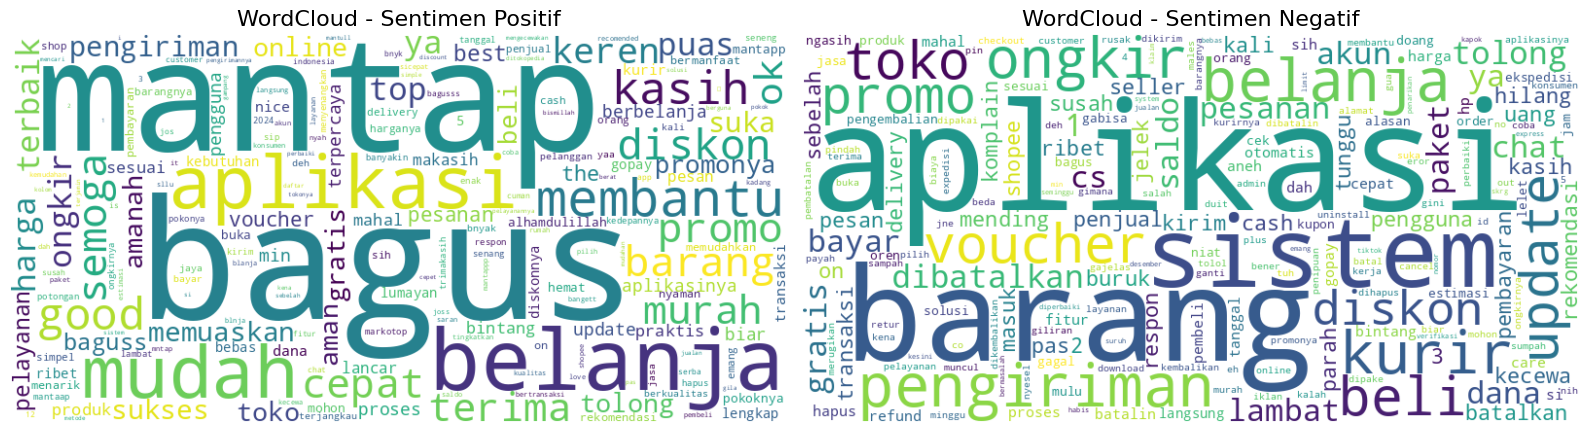

In [ ]:
positive_text = ' '.join(new_df[new_df['pred_label'] == 'positive']['content_prepo'])
negative_text = ' '.join(new_df[new_df['pred_label'] == 'negative']['content_prepo'])

excluded_words = {"Tokopedia","tokopedia", "nya", "pakai","oke"}

positive_tokens = [word for word in word_tokenize(positive_text)
                   if word not in stopwords and word.strip() and word not in excluded_words]

negative_tokens = [word for word in word_tokenize(negative_text)
                   if word not in stopwords and word.strip() and word not in excluded_words]

positive_tokens = [word for word in word_tokenize(positive_text) if word not in stopwords and word.strip()]
negative_tokens = [word for word in word_tokenize(negative_text) if word not in stopwords and word.strip()]

# Hitung frekuensi kata
positive_counts = Counter(positive_tokens)
negative_counts = Counter(negative_tokens)

# Hapus kata-kata yang tidak diinginkan dari Counter
positive_counts = {word: count for word, count in positive_counts.items() if word not in excluded_words}
negative_counts = {word: count for word, count in negative_counts.items() if word not in excluded_words}

print(f'positif : {positive_counts}')
print(f'negatif : {negative_counts}')

# Visualisasi WordCloud kiri dan kanan
def plot_wordcloud_side_by_side(positive_counts, negative_counts, title_positive, title_negative):
    if len(positive_counts) > 0 or len(negative_counts) > 0:
        fig, axes = plt.subplots(1, 2, figsize=(16, 8))
        if len(positive_counts) > 0:
            positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_counts)
            axes[0].imshow(positive_wordcloud, interpolation='bilinear')
            axes[0].axis('off')
            axes[0].set_title(title_positive, fontsize=16)
        else:
            axes[0].text(0.5, 0.5, 'Tidak ada kata untuk visualisasi', ha='center', va='center', fontsize=12)
            axes[0].axis('off')

        if len(negative_counts) > 0:
            negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_counts)
            axes[1].imshow(negative_wordcloud, interpolation='bilinear')
            axes[1].axis('off')
            axes[1].set_title(title_negative, fontsize=16)
        else:
            axes[1].text(0.5, 0.5, 'Tidak ada kata untuk visualisasi', ha='center', va='center', fontsize=12)
            axes[1].axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("Tidak ada kata untuk divisualisasikan pada kedua WordCloud.")

# Panggil fungsi untuk WordCloud
plot_wordcloud_side_by_side(positive_counts, negative_counts,
                            "WordCloud - Sentimen Positif",
                            "WordCloud - Sentimen Negatif")



## Pake Clustering

waktu uji coba terakhir : pas imlek

In [ ]:
clust_data = new_df.copy().head(1000) #ambil 100 data
clust_data = clust_data[['content_stemmed','pred_label']]
clust_data = clust_data.ffill()
clust_data.tail(10)

,content_stemmed,pred_label
990,kirim jne lumayan gerak kesini lempar idexpres...,negative
991,kapok belanja brg bayar aju komplin bales bela...,negative
992,bagus b,positive
993,error,negative
994,poko the best tokopedia,positive
995,suka belanja tokopedia,positive
996,mantap,positive
997,aplikasi bagus promo diskon barang bantu moga ...,positive
998,uda rutin belanja aplikasi initapi kali kecewa...,negative
999,good,positive


In [ ]:
%pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


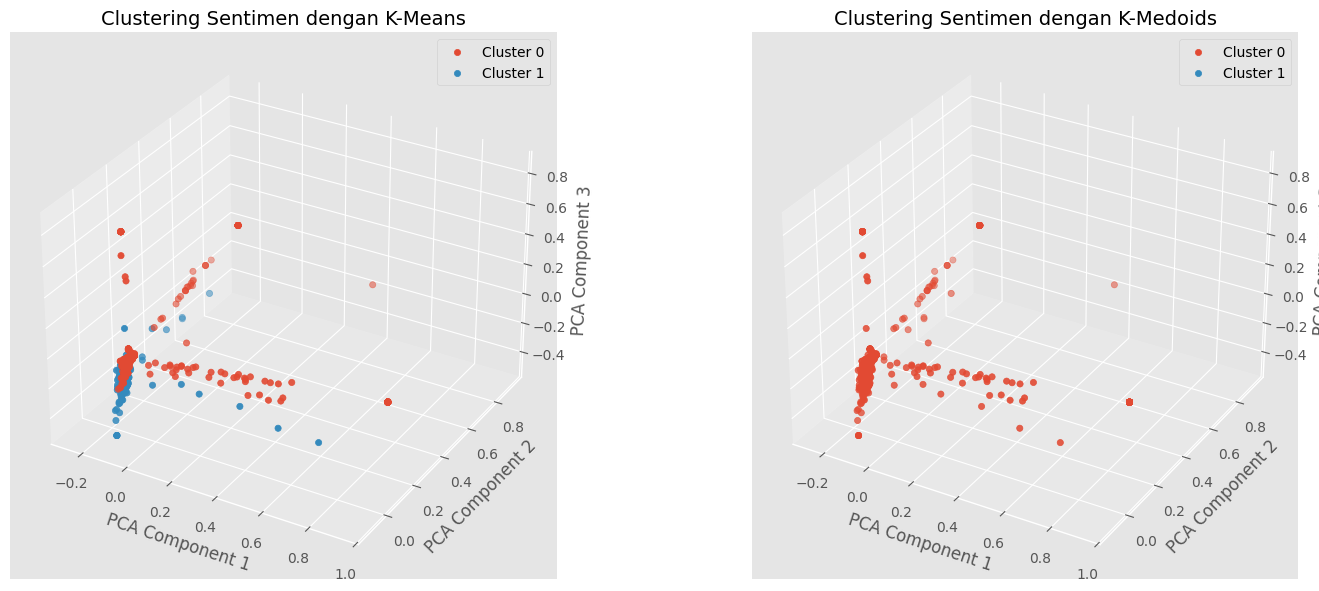

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA

# Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(max_features=1000)  # Batasi hingga 1000 fitur
X = vectorizer.fit_transform(clust_data['content_stemmed'])

# Clustering dengan K-Means dan K-Medoids
num_clusters = 2

# K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
clust_data['cluster_kmeans'] = kmeans.labels_

# K-Medoids
kmedoids = KMedoids(n_clusters=num_clusters, random_state=42, metric="euclidean")
kmedoids.fit(X)
clust_data['cluster_kmedoid'] = kmedoids.labels_

# Reduksi dimensi dengan PCA menjadi 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Setup figure untuk 3D
fig = plt.figure(figsize=(16, 6))

# Scatter plot 3D untuk K-Means
ax1 = fig.add_subplot(121, projection='3d')
for cluster in range(num_clusters):
    cluster_points = X_pca[clust_data['cluster_kmeans'] == cluster]
    ax1.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster}')
ax1.set_title("Clustering Sentimen dengan K-Means", fontsize=14)
ax1.set_xlabel("PCA Component 1")
ax1.set_ylabel("PCA Component 2")
ax1.set_zlabel("PCA Component 3")
ax1.legend()

# Scatter plot 3D untuk K-Medoids
ax2 = fig.add_subplot(122, projection='3d')
for cluster in range(num_clusters):
    cluster_points = X_pca[clust_data['cluster_kmedoid'] == cluster]
    ax2.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster}')
ax2.set_title("Clustering Sentimen dengan K-Medoids", fontsize=14)
ax2.set_xlabel("PCA Component 1")
ax2.set_ylabel("PCA Component 2")
ax2.set_zlabel("PCA Component 3")
ax2.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()


PREDIKSI dari data yang sudah di stemming dan diberi label